# How to analyse 100 GB of data on your laptop with Python

https://towardsdatascience.com/how-to-analyse-100s-of-gbs-of-data-on-your-laptop-with-python-f83363dda94
https://nbviewer.jupyter.org/github/vaexio/vaex-examples/blob/master/medium-nyc-taxi-data-eda/vaex-taxi-article.ipynb

Data can be found 
https://docs.vaex.io/en/master/datasets.html


In [5]:
# import sys
# !jupyter nbextension enable --sys-prefix --py widgetsnbextension
# !jupyter nbextension enable --sys-prefix --py bqplot
# !jupyter nbextension enable --sys-prefix --py ipyvolume
# !jupyter nbextension enable --sys-prefix --py ipympl
# !jupyter nbextension enable --sys-prefix --py ipyleaflet        

In [1]:
import vaex
import vaex.jupyter
import numpy as np
import pylab as plt
%matplotlib inline


In [2]:
# Read in the data from disk
df = vaex.open('./data/nyc_taxi2015.hdf5')

In [3]:
# A view into the data
df

#,VendorID,dropoff_dayofweek,dropoff_hour,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_dayofweek,pickup_hour,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,2,3.0,19.0,40.75061798095703,-73.97478485107422,1.0,12.0,0.3,0.5,1,1,3.0,19.0,40.7501106262207,-73.993896484375,3.25,0.0,17.05,2015-01-15 19:23:42.000000000,2015-01-15 19:05:39.000000000,1.59
1,1,5.0,20.0,40.75910949707031,-73.99441528320312,0.5,14.5,0.3,0.5,1,1,5.0,20.0,40.7242431640625,-74.00164794921875,2.0,0.0,17.8,2015-01-10 20:53:28.000000000,2015-01-10 20:33:38.000000000,3.3
2,1,5.0,20.0,40.82441329956055,-73.95182037353516,0.5,9.5,0.3,0.5,1,2,5.0,20.0,40.80278778076172,-73.96334075927734,0.0,0.0,10.8,2015-01-10 20:43:41.000000000,2015-01-10 20:33:38.000000000,1.8
3,1,5.0,20.0,40.71998596191406,-74.00432586669923,0.5,3.5,0.3,0.5,1,2,5.0,20.0,40.71381759643555,-74.00908660888672,0.0,0.0,4.8,2015-01-10 20:35:31.000000000,2015-01-10 20:33:39.000000000,0.5
4,1,5.0,20.0,40.742652893066406,-74.00418090820312,0.5,15.0,0.3,0.5,1,2,5.0,20.0,40.762428283691406,-73.97117614746094,0.0,0.0,16.3,2015-01-10 20:52:58.000000000,2015-01-10 20:33:39.000000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"146,112,984",2,4.0,0.0,40.722469329833984,-73.98621368408203,0.5,7.5,0.3,0.5,5,1,3.0,23.0,40.72087097167969,-73.99381256103516,1.76,0.0,10.56,2016-01-01 00:08:18.000000000,2015-12-31 23:59:56.000000000,1.2
"146,112,985",1,4.0,0.0,40.75238800048828,-73.93951416015625,0.5,7.5,0.3,0.5,2,2,3.0,23.0,40.76028060913085,-73.96527099609375,0.0,0.0,8.8,2016-01-01 00:05:19.000000000,2015-12-31 23:59:58.000000000,2.0
"146,112,986",1,4.0,0.0,40.69329833984375,-73.9886703491211,0.5,13.5,0.3,0.5,2,2,3.0,23.0,40.73907852172852,-73.98729705810547,0.0,0.0,14.8,2016-01-01 00:12:55.000000000,2015-12-31 23:59:59.000000000,3.8
"146,112,987",2,4.0,0.0,40.705322265625,-74.01712036132812,0.5,8.5,0.3,0.5,1,2,3.0,23.0,40.72569274902344,-73.99755859375,0.0,0.0,9.8,2016-01-01 00:10:26.000000000,2015-12-31 23:59:59.000000000,1.96


In [6]:
# Get a high level overview of the DataFrame
# Takes several minutes

#df.describe()

In [4]:
# Interactively visualise the pickup locations of all taxi trips in our dataset.
df.plot_widget(df.pickup_longitude, 
               df.pickup_latitude, 
               shape=512, 
               limits='minmax',
               f='log1p', 
               colormap='plasma')

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Plot2dDefault(w=None, what='count(*)', x='pickup_longitude', y='pickup_latitude', z=None)

In [7]:
# Define the boundaries by interactively choosing the area of interest!
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

# Make a selection based on the boundaries
df_filtered = df[(df.pickup_longitude > long_min)  & (df.pickup_longitude < long_max) & \
                 (df.pickup_latitude > lat_min)    & (df.pickup_latitude < lat_max) & \
                 (df.dropoff_longitude > long_min) & (df.dropoff_longitude < long_max) & \
                 (df.dropoff_latitude > lat_min)   & (df.dropoff_latitude < lat_max)]

In [8]:
import seaborn as sns


[----------------------------------------]:   0.00% estimated time: unknown                 

<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in less


[########################################]:  100.00% elapsed time  :       71s =  1.2m =  0.0h
 

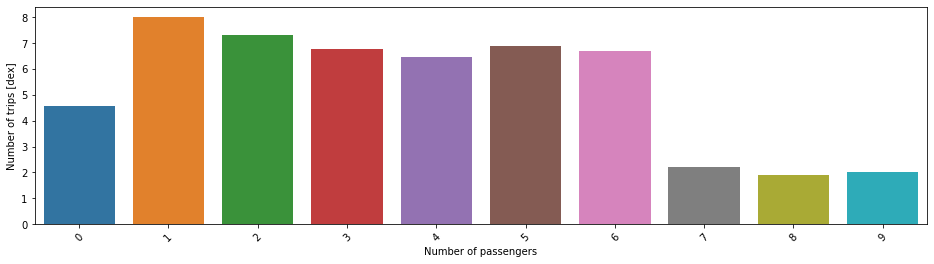

In [9]:
# Get number of unique trips with certain number of passengers
num_passengers = df_filtered.passenger_count.value_counts(progress=True)

# Plot the result
plt.figure(figsize=(16, 4))
sns.barplot(x=num_passengers.index, y=np.log10(num_passengers.values))
plt.xlabel('Number of passengers')
plt.ylabel('Number of trips [dex]')
plt.xticks(rotation='45')
plt.show()